# Project: Wrangling and Analyze Data

# Table of Contents

1. [Importing libaries](#libaries)

2. [Data Gathering](#Data_Gathering)

3. [Assesssing Data](#data_assessing)

4. [Cleaning Data](#data_cleaning)


In [1]:
#importing necessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import json
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'TSV FILES'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
image_predictions_url = 'https://video.udacity-data.com/topher/2018/November/5bf60fe7_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)
with open(os.path.join(folder_name, image_predictions_url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
image_predictions_data = pd.read_csv('TSV FILES/image-predictions.tsv', sep ='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            pass
end = timer()
print(end - start)
print(fails_dict)            

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 8841626705843773

348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 827324948884643840
383: 827228250799742977
384: 827199976799354881
385: 826958653328592898
386: 826848821049180160
387: 826615380357632002
388: 826598799820865537
389: 82659836527

690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 782722598790725632
727: 782598640137187329
728: 782305867769217024
729: 782021823840026624
730: 781955203444699136
731: 78166188247

1031: 745433870967832576
1032: 745422732645535745
1033: 745314880350101504
1034: 745074613265149952
1035: 745057283344719872
1036: 744995568523612160
1037: 744971049620602880
1038: 744709971296780288
1039: 744334592493166593
1040: 744234799360020481
1041: 744223424764059648
1042: 743980027717509120
1043: 743895849529389061
1044: 743835915802583040
1045: 743609206067040256
1046: 743595368194129920
1047: 743545585370791937
1048: 743510151680958465
1049: 743253157753532416
1050: 743222593470234624
1051: 743210557239623680
1052: 742534281772302336
1053: 742528092657332225
1054: 742465774154047488
1055: 742423170473463808
1056: 742385895052087300
1057: 742161199639494656
1058: 742150209887731712
1059: 741793263812808706
1060: 741743634094141440
1061: 741438259667034112
1062: 741303864243200000
1063: 741099773336379392
1064: 741067306818797568
1065: 740995100998766593
1066: 740711788199743490
1067: 740699697422163968
1068: 740676976021798912
1069: 740373189193256964
1070: 740365076218183684


1360: 703356393781329922
1361: 703268521220972544
1362: 703079050210877440
1363: 703041949650034688
1364: 702932127499816960
1365: 702899151802126337
1366: 702684942141153280
1367: 702671118226825216
1368: 702598099714314240
1369: 702539513671897089
1370: 702332542343577600
1371: 702321140488925184
1372: 702276748847800320
1373: 702217446468493312
1374: 701981390485725185
1375: 701952816642965504
1376: 701889187134500865
1377: 701805642395348998
1378: 701601587219795968
1379: 701570477911896070
1380: 701545186879471618
1381: 701214700881756160
1382: 700890391244103680
1383: 700864154249383937
1384: 700847567345688576
1385: 700796979434098688
1386: 700747788515020802
1387: 700518061187723268
1388: 700505138482569216
1389: 700462010979500032
1390: 700167517596164096
1391: 700151421916807169
1392: 700143752053182464
1393: 700062718104104960
1394: 700029284593901568
1395: 700002074055016451
1396: 699801817392291840
1397: 699788877217865730
1398: 699779630832685056
1399: 699775878809702401


1689: 681523177663676416
1690: 681340665377193984
1691: 681339448655802368
1692: 681320187870711809
1693: 681302363064414209
1694: 681297372102656000
1695: 681281657291280384
1696: 681261549936340994
1697: 681242418453299201
1698: 681231109724700672
1699: 681193455364796417
1700: 680970795137544192
1701: 680959110691590145
1702: 680940246314430465
1703: 680934982542561280
1704: 680913438424612864
1705: 680889648562991104
1706: 680836378243002368
1707: 680805554198020098
1708: 680801747103793152
1709: 680798457301471234
1710: 680609293079592961
1711: 680583894916304897
1712: 680497766108381184
1713: 680494726643068929
1714: 680473011644985345
1715: 680440374763077632
1716: 680221482581123072
1717: 680206703334408192
1718: 680191257256136705
1719: 680176173301628928
1720: 680161097740095489
1721: 680145970311643136
1722: 680130881361686529
1723: 680115823365742593
1724: 680100725817409536
1725: 680085611152338944
1726: 680070545539371008
1727: 680055455951884288
1728: 679877062409191424


2018: 672160042234327040
2019: 672139350159835138
2020: 672125275208069120
2021: 672095186491711488
2022: 672082170312290304
2023: 672068090318987265
2024: 671896809300709376
2025: 671891728106971137
2026: 671882082306625538
2027: 671879137494245376
2028: 671874878652489728
2029: 671866342182637568
2030: 671855973984772097
2031: 671789708968640512
2032: 671768281401958400
2033: 671763349865160704
2034: 671744970634719232
2035: 671743150407421952
2036: 671735591348891648
2037: 671729906628341761
2038: 671561002136281088
2039: 671550332464455680
2040: 671547767500775424
2041: 671544874165002241
2042: 671542985629241344
2043: 671538301157904385
2044: 671536543010570240
2045: 671533943490011136
2046: 671528761649688577
2047: 671520732782923777
2048: 671518598289059840
2049: 671511350426865664
2050: 671504605491109889
2051: 671497587707535361
2052: 671488513339211776
2053: 671486386088865792
2054: 671485057807351808
2055: 671390180817915904
2056: 671362598324076544
2057: 671357843010908160


2347: 666058600524156928
2348: 666057090499244032
2349: 666055525042405380
2350: 666051853826850816
2351: 666050758794694657
2352: 666049248165822465
2353: 666044226329800704
2354: 666033412701032449
2355: 666029285002620928
2356: 666020888022790149
330.796955711
{}


In [7]:
json_file = open('tweet-json.txt',encoding = 'utf-8')
json_tweet_data = pd.read_json(json_file, lines = True)
json_tweet_data = json_tweet_data.rename(columns={"id":"tweet_id"})

json_file.close()

In [8]:
tweet_data=json_tweet_data[['tweet_id','retweet_count','favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive_data.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Daisy          7
Toby           7
Buddy          7
an             7
Rusty          6
Scout          6
Bella          6
Dave           6
Koda           6
Stanley        6
Oscar          6
Jack           6
Leo            6
Jax            6
Milo           6
Phil           5
            ... 
Reagan         1
Rufio          1
Ferg           1
Taz            1
Torque         1
Buckley        1
Dudley         1
Bones          1
Kathmandu      1
Mutt           1
Hazel          1
Maya           1
Birf           1
Darby          1
Jennifur       1
Glenn          1
Rumble         1
Severus        1
Stark          1
Geno           1
Molly          1
Grady          1
Binky          1
Philippe       1
Swagger        1
Scott          1
Combo          1
Wesley        

In [12]:
twitter_archive_data.duplicated().sum()

0

In [13]:
len(twitter_archive_data[twitter_archive_data['name'].str.islower()])

109

In [14]:
twitter_archive_data.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [15]:
twitter_archive_data['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
image_predictions_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
image_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions_data.duplicated().sum()

0

In [19]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [20]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
all_columns = pd.Series(list(twitter_archive_data) + list(image_predictions_data) + list(tweet_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

# Quality issues

 ## twitter_archive_data
 
1. Too many missing values in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) columns.
2. rows with retweeted status

3. Few missing values in expanded_urls column.

4. Wrong data type tweet_id column, it should be string.

5. Wrong data type for timestamp and retweeted_status_timestamp, it should be datetime.

6. The name column contains fake names in small case.

7. the source colums contains html tags.

## image_predictions_data
8. Wrong data type for tweet_id, should be string.

9. Some names in columns p1, p2 & p3 are in small cases.

10. more than one breed predictions.


## tweet_data
11. Wrong data-type tweet_id should be string not int.


### Tidiness issues
1. The doggo, floofer, floofer, pupper, & puppo colunms can be represented as data_type column.                   

2. all 3 dataset can be merged to one.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
twitter_archive_data_clean = twitter_archive_data.copy()
image_predictions_data_clean = image_predictions_data.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1: MISSING VALUES
* Too many missing values in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) columns.
* Few missing values in expanded_urls column.

#### Define: Delete rows with retweet and no urls, drop empty columns

#### Code

In [23]:
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean.in_reply_to_user_id.isnull()]

In [24]:
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean.retweeted_status_id.isnull()]

In [25]:
twitter_archive_data_clean = twitter_archive_data_clean[twitter_archive_data_clean.expanded_urls.notnull()]

#### Test

In [26]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: float64(4), int64(3), object(10)

In [27]:
#droping blank columns
twitter_archive_data_clean = twitter_archive_data_clean.drop(twitter_archive_data_clean.columns[[1,2,6,7,8]] , axis = 1)

In [28]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


### Issue #2: TIDY ISSUES
* The doggo, floofer, floofer, pupper, & puppo colunms can be represented as Dog_group column.
* all 3 dataset can be merged to one.

#### Define
Merge the doggo, floofer, floofer, pupper, & puppo colunms as Dog_group column.

#### Code

In [29]:
# convert None or NaN values by empty value
twitter_archive_data_clean.doggo.replace('None', '', inplace=True)
twitter_archive_data_clean.doggo.replace('np.NaN', '', inplace=True)
twitter_archive_data_clean.floofer.replace('None', '', inplace=True)
twitter_archive_data_clean.floofer.replace('np.NaN', '', inplace=True)
twitter_archive_data_clean.pupper.replace('None', '', inplace=True)
twitter_archive_data_clean.pupper.replace('np.NaN', '', inplace=True)
twitter_archive_data_clean.puppo.replace('None', '', inplace=True)
twitter_archive_data_clean.puppo.replace('np.NaN', '', inplace=True)

# create Dog_group column assembeling the 4 columns groups
twitter_archive_data_clean['Dog_group'] = twitter_archive_data_clean.doggo + twitter_archive_data_clean.floofer + twitter_archive_data_clean.pupper + twitter_archive_data_clean.puppo
twitter_archive_data_clean.loc[twitter_archive_data_clean.Dog_group == 'doggopupper', 'Dog_group'] = 'doggo, pupper'
twitter_archive_data_clean.loc[twitter_archive_data_clean.Dog_group == 'doggopuppo', 'Dog_group'] = 'doggo, puppo'
twitter_archive_data_clean.loc[twitter_archive_data_clean.Dog_group == 'doggofloofer', 'Dog_group'] = 'doggo, floofer'

#### Test

In [30]:
twitter_archive_data_clean.Dog_group.value_counts()

                  1759
pupper             220
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: Dog_group, dtype: int64

In [31]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
Dog_group             2094 non-null object
dtypes: int64(3), object(10)
memory usage: 229.0+ KB


#### Define
change the timestamp data type to datetime

#### Code

In [32]:
#change timestamp datatype to datetime
twitter_archive_data_clean['timestamp'] = pd.to_datetime(twitter_archive_data_clean['timestamp'])

#### Test

In [33]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
Dog_group             2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 229.0+ KB


In [34]:
twitter_archive_data_clean.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dog_group
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,


## Quality issues:

#### Define
create a dog_rating column 

#### Code

In [35]:
twitter_archive_data_clean['dog_rating'] = twitter_archive_data_clean.rating_numerator/twitter_archive_data_clean.rating_denominator

#### Test

In [36]:
twitter_archive_data_clean.dog_rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: dog_rating, dtype: float64

#### Define
* extract source by removing tags 

#### Code

In [37]:
twitter_archive_data_clean.source = twitter_archive_data_clean.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

#### Test

In [38]:
twitter_archive_data_clean.source.tail()

2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, dtype: object

#### Define
* drop all fake names

#### Code

In [39]:
fake_names = twitter_archive_data_clean.name.str.islower()
names = 'name'
twitter_archive_data_clean.loc[fake_names, names]=np.nan

#### Test

In [40]:
twitter_archive_data_clean.name.value_counts()

None       600
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Sadie        8
Winston      8
Lola         8
Daisy        7
Toby         7
Oscar        6
Bo           6
Koda         6
Jax          6
Bella        6
Bailey       6
Stanley      6
Louis        5
Scout        5
Buddy        5
Bentley      5
Chester      5
Milo         5
Rusty        5
Leo          5
Dave         5
Oakley       4
Finn         4
          ... 
Cal          1
Stormy       1
Adele        1
Amélie       1
Alf          1
Stuart       1
Barney       1
Stella       1
Charl        1
Millie       1
Butter       1
Kane         1
Swagger      1
Kona         1
Monster      1
Astrid       1
Willem       1
Jeb          1
Oddie        1
Puff         1
Donny        1
Rambo        1
Divine       1
Sage         1
Edd          1
Andru        1
Josep        1
Jeffri       1
Timofy       1
Pete         1
Name: name, Length: 930, dtype: int64

In [41]:
twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1990 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
Dog_group             2094 non-null object
dog_rating            2094 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 245.4+ KB


#### Define
* convert columns p1 p2 p3 to lower case

#### Code

In [42]:
image_predictions_data_clean['p1'] = image_predictions_data_clean['p1'].str.lower()
image_predictions_data_clean['p2'] = image_predictions_data_clean['p2'].str.lower()
image_predictions_data_clean['p3'] = image_predictions_data_clean['p3'].str.lower()

#### Test

In [43]:
image_predictions_data_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define
* Drop columns with false predictions

#### Code

In [44]:
# drop columns which had false values
image_predictions_data_clean = image_predictions_data_clean.drop(image_predictions_data_clean.loc[(image_predictions_data_clean.p1_dog == False) 
                                                     & (image_predictions_data_clean.p3_dog == False) 
                                                     & (image_predictions_data_clean.p2_dog == False)].index, axis = 0)

#### Test

In [45]:
image_predictions_data_clean.loc[(image_predictions_data_clean.p1_dog == False) & (image_predictions_data_clean.p3_dog == False) 
                  & (image_predictions_data_clean.p2_dog == False)].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### Define
* Create dog breed colum by filtering the image predictions data

#### Code

In [46]:
# create a filter function
def filter(a, b, c, d, e, f, g, h, i): 
    if a and d>=e and d>=f:
        return g
    elif b and e>=d and e>=f:
        return h
    elif c and f>=d and f>=e:
        return i
    elif a and b == False and c == False :
        return g
    elif b and a == False and c == False:
        return h
    elif c and a == False and b == False:
        return i
    elif b and c and a == False and e >= f :
        return h
    elif b and c and a == False and f >= e:
        return i
    
#Applying the filter function
image_predictions_data_clean['dog_breed'] = image_predictions_data_clean.apply(lambda row : filter(row['p1_dog'], row['p2_dog'], 
                                                   row['p3_dog'], row['p1_conf'], row['p2_conf'], 
                                                   row['p3_conf'], row['p1'], row['p2'], row['p3']), axis = 1) 

#### Test

In [47]:
image_predictions_data_clean.dog_breed.head()

0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
Name: dog_breed, dtype: object

#### Define
* merge all 3 datasets

#### Code

In [48]:
dog_ratings_data = pd.merge(twitter_archive_data_clean,image_predictions_data_clean, how='inner', on=['tweet_id'])
dog_ratings_data= pd.merge(dog_ratings_data,tweet_data_clean, how='inner', on=['tweet_id'])

#### Test

In [49]:
dog_ratings_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,...,True,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,...,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,labrador_retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,...,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,chesapeake_bay_retriever,3261,20562


In [50]:
dog_ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 28 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1586 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
Dog_group             1666 non-null object
dog_rating            1666 non-null float64
jpg_url               1666 non-null object
img_num               1666 non-null int64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null bool
p2                    1666 non-null object
p2_conf               1666 no

#### Define
* Remove columns that are not needed

#### Code

In [51]:
columns=['timestamp', 'rating_numerator', 'rating_denominator'
         , 'doggo','floofer','pupper','puppo','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
dog_ratings_data = dog_ratings_data.drop(columns, axis=1)

#### Test

In [52]:
dog_ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 12 columns):
tweet_id          1666 non-null int64
source            1666 non-null object
text              1666 non-null object
expanded_urls     1666 non-null object
name              1586 non-null object
Dog_group         1666 non-null object
dog_rating        1666 non-null float64
jpg_url           1666 non-null object
img_num           1666 non-null int64
dog_breed         1666 non-null object
retweet_count     1666 non-null int64
favorite_count    1666 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 169.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
dog_ratings_data.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
dog_ratings_data= pd.read_csv('twitter_archive_master.csv')
dog_ratings_data.head()

,tweet_id,source,text,expanded_urls,name,Dog_group,dog_rating,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,6514,33819
1,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,4328,25461
2,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,8964,42908
3,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048
4,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,NaN,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,3261,20562


#### Research Questions
* what is the most commo dog group?
* What dog group got the highest highest retweet counts and favourite count?
* What are the top 5 predicted dog breeds with the highest retweet count?
* Top 5 most popular dog names.
* What is the relationship between dog rating, retweet count and favourite  count?

### Visualizations

### question 1
what is the most commo dog group?

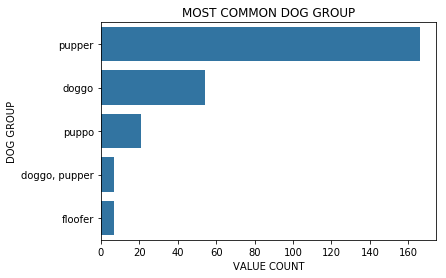

In [55]:
top_name = dog_ratings_data['Dog_group'].value_counts()[:5]
mycol = sns.color_palette()[0]
sns.barplot(top_name.values, top_name.index, color= mycol)
plt.title('MOST COMMON DOG GROUP')
plt.xlabel('VALUE COUNT')
plt.ylabel('DOG GROUP');

#### Question2
* What dog group got the highest dog rating, retweet counts(popular) and favourite count(loved)?

#### Code

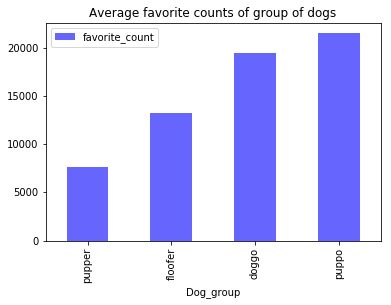

In [56]:
# we only need the rows with stages
dog_group = dog_ratings_data[dog_ratings_data['Dog_group'].isnull()==False]
#visualization 'Average favorite counts by stages of dogs'
dog_group = dog_group.query('Dog_group=="pupper" or Dog_group =="doggo" or Dog_group =="puppo" or Dog_group =="floofer"')
dog_group_favourite_count = pd.DataFrame(dog_group.groupby('Dog_group').favorite_count.mean().sort_values())
dog_group_favourite_count['Dog_group'] = dog_group_favourite_count.index
dog_group_favourite_count.plot(x='Dog_group',y='favorite_count',kind='bar',title="Average favorite counts of group of dogs",color='b', alpha=0.6);

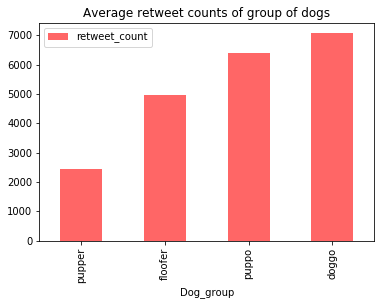

In [57]:
# we only need the rows with stages
dog_group = dog_ratings_data[dog_ratings_data['Dog_group'].isnull()==False]
#visualization 'Average favorite counts by stages of dogs'
dog_group = dog_group.query('Dog_group=="pupper" or Dog_group =="doggo" or Dog_group =="puppo" or Dog_group =="floofer"')
dog_group_retweet_count = pd.DataFrame(dog_group.groupby('Dog_group').retweet_count.mean().sort_values())
dog_group_retweet_count['Dog_group'] = dog_group_retweet_count.index
dog_group_retweet_count.plot(x='Dog_group', y ='retweet_count',kind='bar',title="Average retweet counts of group of dogs",color='r', alpha=0.6);

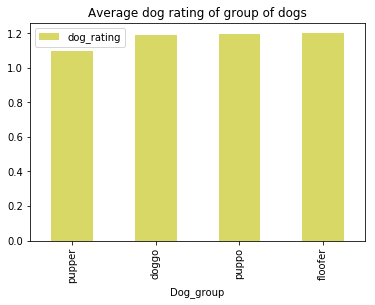

In [58]:
# we only need the rows with stages
dog_group = dog_ratings_data[dog_ratings_data['Dog_group'].isnull()==False]
#visualization 'Average favorite counts by dog rating'
dog_group = dog_group.query('Dog_group=="pupper" or Dog_group =="doggo" or Dog_group =="puppo" or Dog_group =="floofer"')
dog_group_dog_rating = pd.DataFrame(dog_group.groupby('Dog_group').dog_rating.mean().sort_values())
dog_group_dog_rating['Dog_group'] = dog_group_dog_rating.index
dog_group_dog_rating.plot(x='Dog_group', y ='dog_rating',kind='bar',title="Average dog rating of group of dogs",color='y', alpha=0.6);

#### Question 3
* What are the top 5 predicted dog breeds?

#### Code

Text(0,0.5,'DOG BREED')

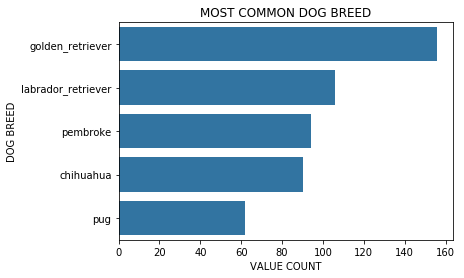

In [59]:
top_name = dog_ratings_data['dog_breed'].value_counts()[:5]
sns.barplot(top_name.values, top_name.index, color=mycol)
plt.title('MOST COMMON DOG BREED')
plt.xlabel('VALUE COUNT')
plt.ylabel('DOG BREED')

#### Question 3
* What dog breed got the highest dog rating, retweet counts(popular) and favourite count(loved)?

#### Code

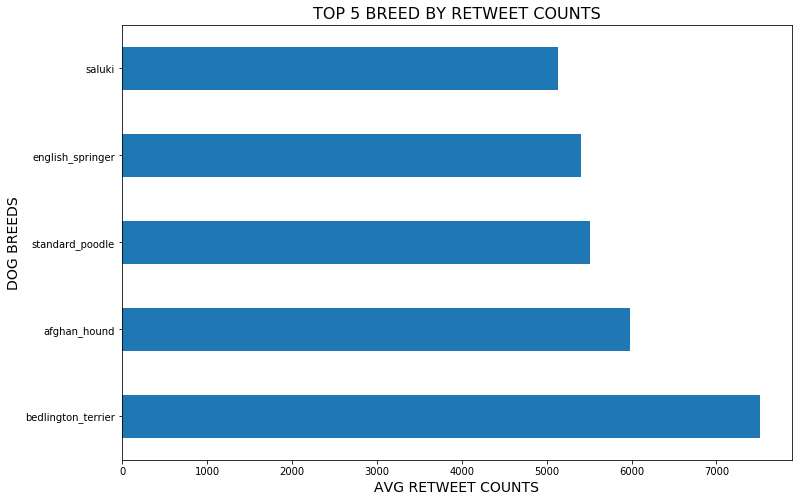

In [60]:
dog_breed_retweet_count = dog_ratings_data.groupby('dog_breed').retweet_count.mean().round(2).sort_values(ascending = False).iloc[:5]
dog_breed_retweet_count.plot(kind='barh', figsize=[12, 8], color=mycol)
plt.title('TOP 5 BREED BY RETWEET COUNTS', fontsize = 16) 
plt.xlabel('AVG RETWEET COUNTS', fontsize = 14)
plt.ylabel('DOG BREEDS', fontsize = 14);

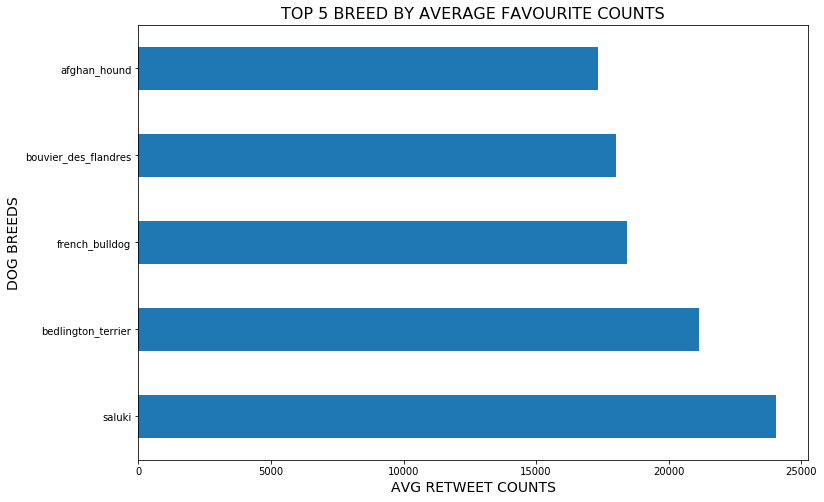

In [61]:
dog_breed_favorite_count = dog_ratings_data.groupby('dog_breed').favorite_count.mean().round(2).sort_values(ascending = False).iloc[:5]
dog_breed_favorite_count.plot(kind='barh', figsize=[12, 8], color=mycol)
plt.title('TOP 5 BREED BY AVERAGE FAVOURITE COUNTS', fontsize = 16) 
plt.xlabel('AVG RETWEET COUNTS', fontsize = 14)
plt.ylabel('DOG BREEDS', fontsize = 14);

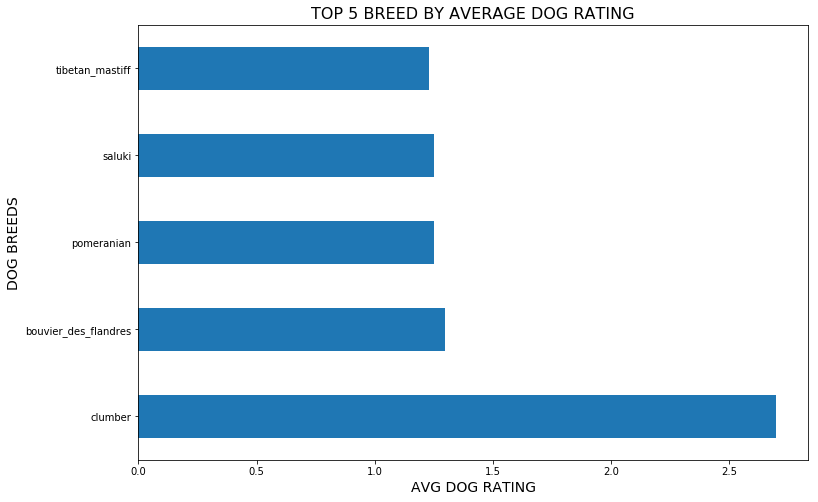

In [62]:
dog_breed_dog_rating = dog_ratings_data.groupby('dog_breed').dog_rating.mean().round(2).sort_values(ascending = False).iloc[:5]
dog_breed_dog_rating.plot(kind='barh', figsize=[12, 8],color=mycol)
plt.title('TOP 5 BREED BY AVERAGE DOG RATING', fontsize = 16) 
plt.xlabel('AVG DOG RATING', fontsize = 14)
plt.ylabel('DOG BREEDS', fontsize = 14);

#### Question 4
* Top 10 most popular dog names.

Text(0,0.5,'DOG NAMES')

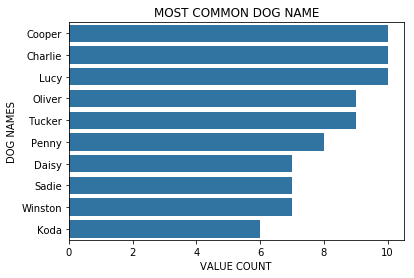

In [63]:
top_name = dog_ratings_data['name'].value_counts()[1:11]
sns.barplot(top_name.values, top_name.index,color=mycol)
plt.title('MOST COMMON DOG NAME')
plt.xlabel('VALUE COUNT')
plt.ylabel('DOG NAMES')

#### Question 5
* What is the relationship between dog rating, retweet count and favourite count?

#### Code

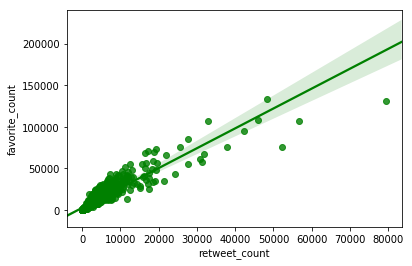

In [64]:
a=sns.regplot(x=dog_ratings_data.retweet_count,y=dog_ratings_data.favorite_count,color="g")
a

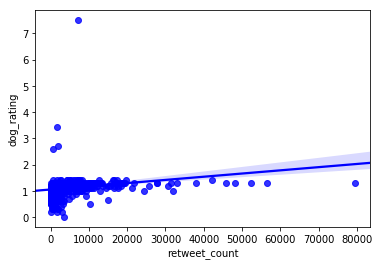

In [65]:
b=sns.regplot(x=dog_ratings_data.retweet_count,y=dog_ratings_data.dog_rating, color="b")
b

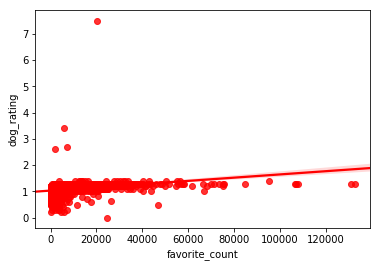

In [66]:
c=sns.regplot(x=dog_ratings_data.favorite_count,y=dog_ratings_data.dog_rating, color="r")
c

In [67]:
df= dog_ratings_data[['dog_rating', 'favorite_count', 'retweet_count']]
df.head()

,dog_rating,favorite_count,retweet_count
0,1.3,33819,6514
1,1.2,25461,4328
2,1.3,42908,8964
3,1.2,41048,9774
4,1.3,20562,3261


,dog_rating,favorite_count,retweet_count
dog_rating,1.000000,0.309097,0.233419
favorite_count,0.309097,1.000000,0.913284
retweet_count,0.233419,0.913284,1.000000


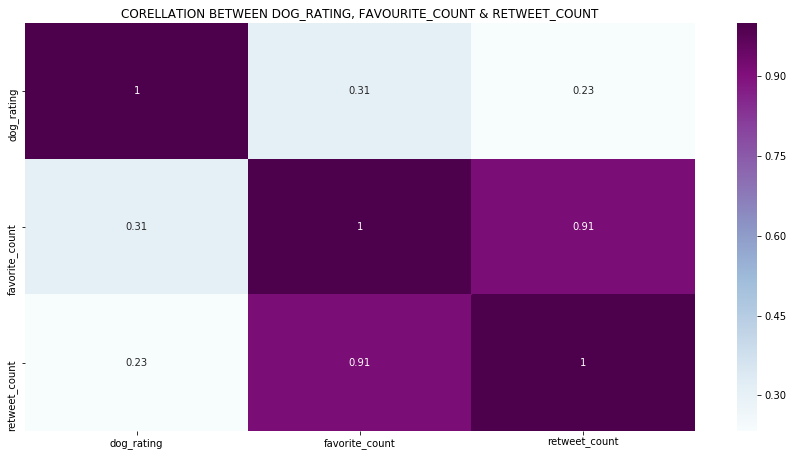

In [68]:
plt.figure(figsize=(15, 7.5))
plt.title('CORELLATION BETWEEN DOG_RATING, FAVOURITE_COUNT & RETWEET_COUNT')
df_corr = df.corr()
sns.heatmap(df_corr,cmap='BuPu', annot=True)
df_corr

### Insights:
1. There is a very strong positive correlation between favorite count and retweet count(i.e.The higher the fovorite count the higher the retweet count), Futhermore there is a weak positive corellation between dog_rating and favourite count also retweet count(i.e. a higher dog rating does not necessary guarantee popularity)

2. average Dog rating value is the same for all dog groups except pupper.

3. Puppo and Doggo are the most favored, they also are the most retweeted.

4. Cooper, lucy, Charlie, Tucker, Oliver, Peny are common names given to dogs.

5. Beddington_terrier, Afghan_hound, French_Bulldog, bourrier_des_flandres, Saluki are the most favored breed.

6. Beddington_terrier, Afghan_hound, Standard_poodle, English_springer, Saluki are the most retweeted breed, they also are the most retweeted.

7. Although the dog rating value difference for each breed is not, the top 5 breeds by dog rating are Border terrier, tibeten_mastiff, briard, Saluki,bouvier_des_flandres.

In [70]:
from subprocess import call
call(['python','-m','nbconvert','wrangle_act.ipynb'])

0